## **Linear vs. Nonlinear**

The "make_moons" data creation routine in sklearn produces non-linear data that is useful for understanding the difference between linear and non-linear classifiers.  he 

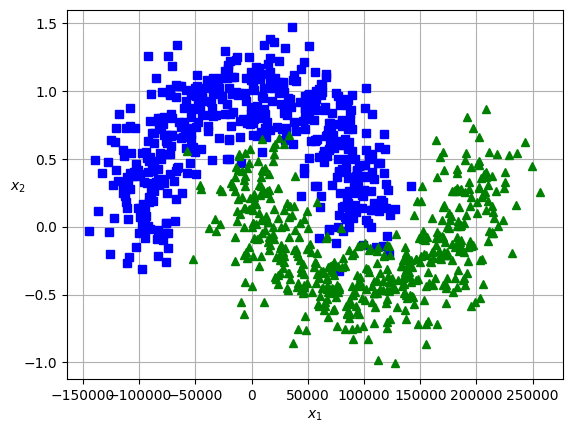

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000


def plot_dataset(X, y, axes=None):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    if axes:
        plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y)



**Exercise 1**

Using a simple train test split, run a simple LogisticRegression classifier on the above data. Try different solvers.  Which works the best?

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

scores = {}

for solver in solvers:
    log_reg = LogisticRegression(solver=solver, random_state=42)
    
    log_reg.fit(X_train, y_train)
    
    y_pred = log_reg.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    
    scores[solver] = score


for solver, score in scores.items():
    print(f"{solver}: {score}")

lbfgs: 0.655
liblinear: 0.655
newton-cg: 0.86
sag: 0.655
saga: 0.655


/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/li

**Exercise 2**

Note that the two dimensions have vastly different magnitudes. Modify the above, using a standard scaler and pipeline to transform the data.  Does it help?  Do the different solvers have the same relative performance?

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']

scores = {}

for solver in solvers:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('log_reg', LogisticRegression(solver=solver, random_state=42))
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    score = accuracy_score(y_test, y_pred)
    
    scores[solver] = score

for solver, score in scores.items():
    print(f"{solver}: {score}")


lbfgs: 0.855
liblinear: 0.855
newton-cg: 0.855
sag: 0.855
saga: 0.855


**Exercise 3**

Try the different following methods to classify your data:

1) GaussianNB
2) KNN (pick the best "nearest neighbors" parameter you can)
3) SVC, linear kernel
4) SVC, poly kernel
5) SVC, rbf kernel

Which performs the best?  Why do you think that is?

In [4]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVC_linear': SVC(kernel='linear'),
    'SVC_poly': SVC(kernel='poly'),
    'SVC_rbf': SVC(kernel='rbf')
}

scores = {}
training_times = {}

for name, clf in classifiers.items():
    start_time = time.time()
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, clf)
    ])
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = pipeline.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores[name] = score
    training_times[name] = training_time

for name, score in scores.items():
    print(f"{name}: Accuracy = {score}, Training Time = {training_times[name]:.4f}s")

best_classifier = max(scores, key=scores.get)
print(f"\nThe best classifier is {best_classifier} with an accuracy of {scores[best_classifier]}")

GaussianNB: Accuracy = 0.855, Training Time = 0.0015s
KNN: Accuracy = 0.98, Training Time = 0.0013s
SVC_linear: Accuracy = 0.855, Training Time = 0.0083s
SVC_poly: Accuracy = 0.85, Training Time = 0.0058s
SVC_rbf: Accuracy = 0.98, Training Time = 0.0041s

The best classifier is KNN with an accuracy of 0.98


**Exercise 4**

In the following, I've set up some code to explore the impact of different parameters and data on an SVC.  As implemented, the current code illustrates how an 'rbf' kernel can overfit the data.  Vary the parameters to examine how different parameters influence performance and overfitting.

1) Try changing the amount of noise in the dataset.  What happens?
2) Try changing the parameter 'gamma.'  What setting seems to avoid overfitting while still performing well.  Have a look at the SVC [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) so you have an understanding of what's going on.
3) Try changing the kernel to a 'poly' kernel, and modify gamma as necessary.  How does this affect performance?

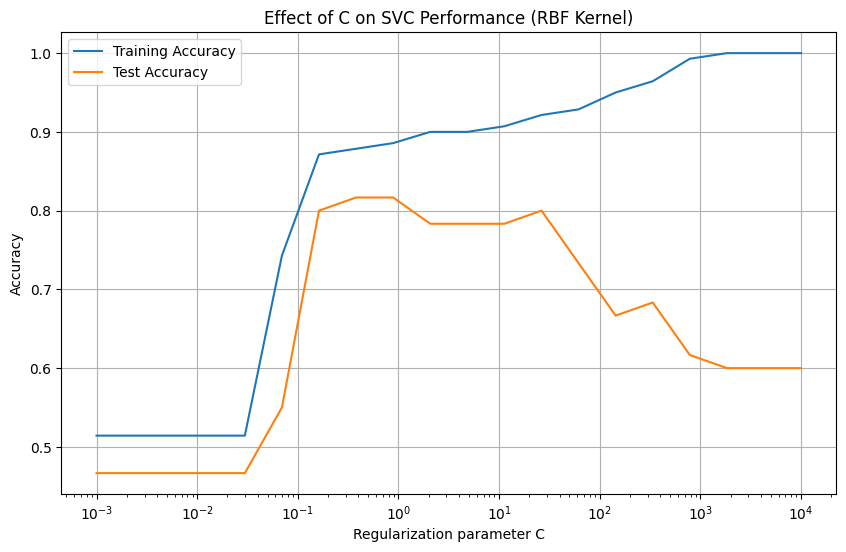

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of C values to explore
C_values = np.logspace(-3, 4, 20)  # From very small to somewhat larger (10^4) C values
train_scores = []
test_scores = []

# Explore the effect of C
for C in C_values:
    clf = SVC(C=C, kernel='rbf', gamma=6)  # Using 'scale' for gamma as an example
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Accuracy')
plt.semilogx(C_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()

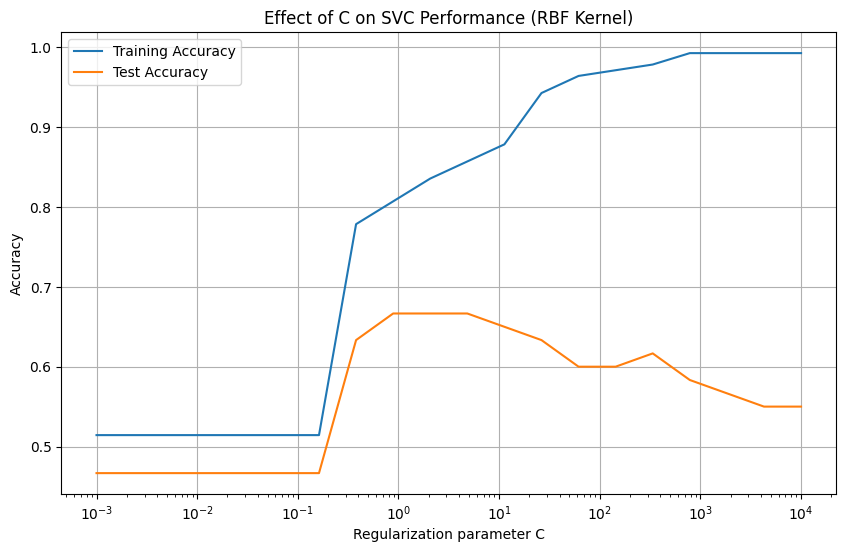

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=1, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of C values to explore
C_values = np.logspace(-3, 4, 20)  # From very small to somewhat larger (10^4) C values
train_scores = []
test_scores = []

# Explore the effect of C
for C in C_values:
    clf = SVC(C=C, kernel='rbf', gamma=6)  # Using 'scale' for gamma as an example
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Accuracy')
plt.semilogx(C_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()

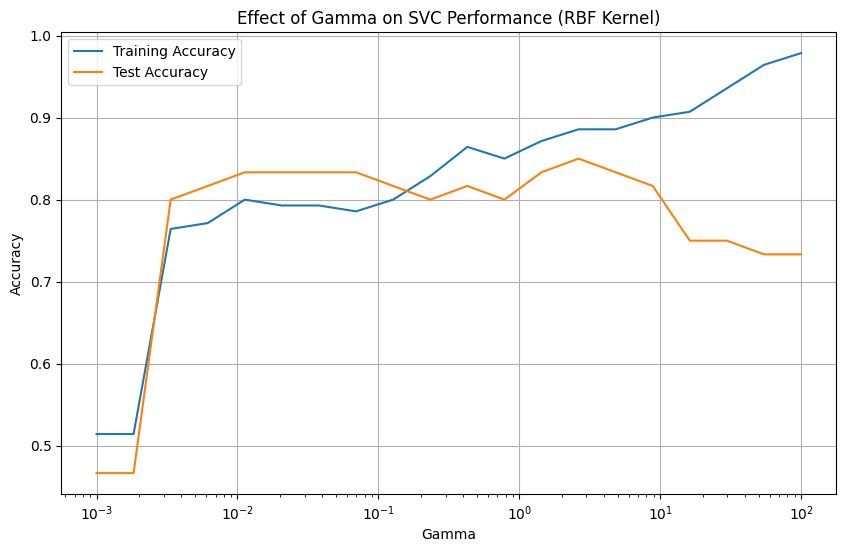

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of gamma values to explore
gamma_values = np.logspace(-3, 2, 20)
train_scores = []
test_scores = []

# Explore the effect of gamma
for gamma in gamma_values:
    clf = SVC(C=1.0, kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(gamma_values, train_scores, label='Training Accuracy')
plt.semilogx(gamma_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Effect of Gamma on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()

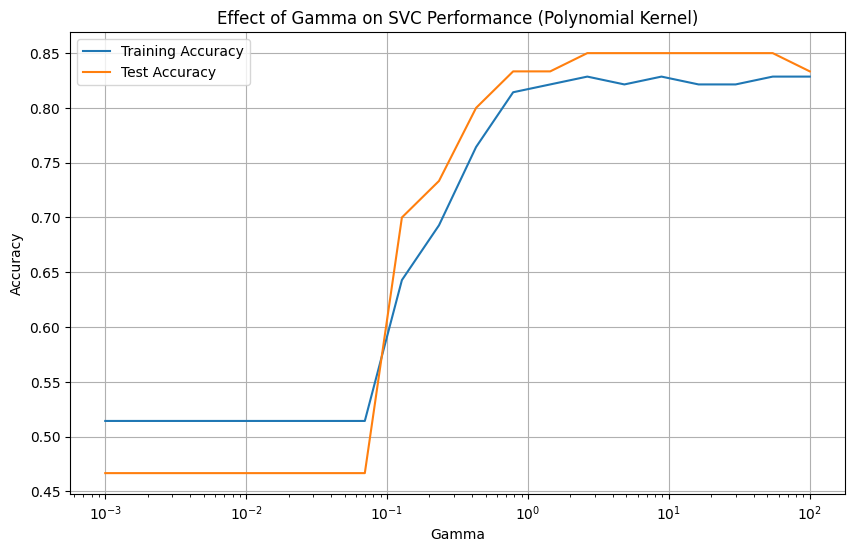

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of gamma values to explore
gamma_values = np.logspace(-3, 2, 20)
train_scores = []
test_scores = []

# Explore the effect of gamma
for gamma in gamma_values:
    clf = SVC(C=1.0, kernel='poly', degree=3, gamma=gamma)
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(gamma_values, train_scores, label='Training Accuracy')
plt.semilogx(gamma_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('Effect of Gamma on SVC Performance (Polynomial Kernel)')
plt.grid(True)
plt.show()